In [1]:
# Set working directory
setwd("C:\\Users\\myraw\\Jupyter\\DSC640")

# Import libraries
library(readxl)
library(ggplot2)
library(treemapify)

Warning message:
"package 'readxl' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'treemapify' was built under R version 3.6.3"

In [2]:
# take a look at the dataset
df <- read_excel('expenditures.xlsx')
head(df)

year,category,expenditure,sex
2008,Food,6443,1
2008,Alcoholic Beverages,444,1
2008,Housing,17109,1
2008,Apparel,1801,1
2008,Transportation,8604,1
2008,Healthcare,2976,1


In [8]:
# take a look at the dataset
df2 <- read.csv('unemployement-rate-1948-2010.csv')
head(df2)

Series.id,Year,Period,Value
LNS14000000,1948,M01,3.4
LNS14000000,1948,M02,3.8
LNS14000000,1948,M03,4.0
LNS14000000,1948,M04,3.9
LNS14000000,1948,M05,3.5
LNS14000000,1948,M06,3.6


In [3]:
# Subset some data to create a treemap with
tmap <- subset(df, year == 2008)
eightYr <- df[(df$year <= 2008) & (df$year >= 2000), ]

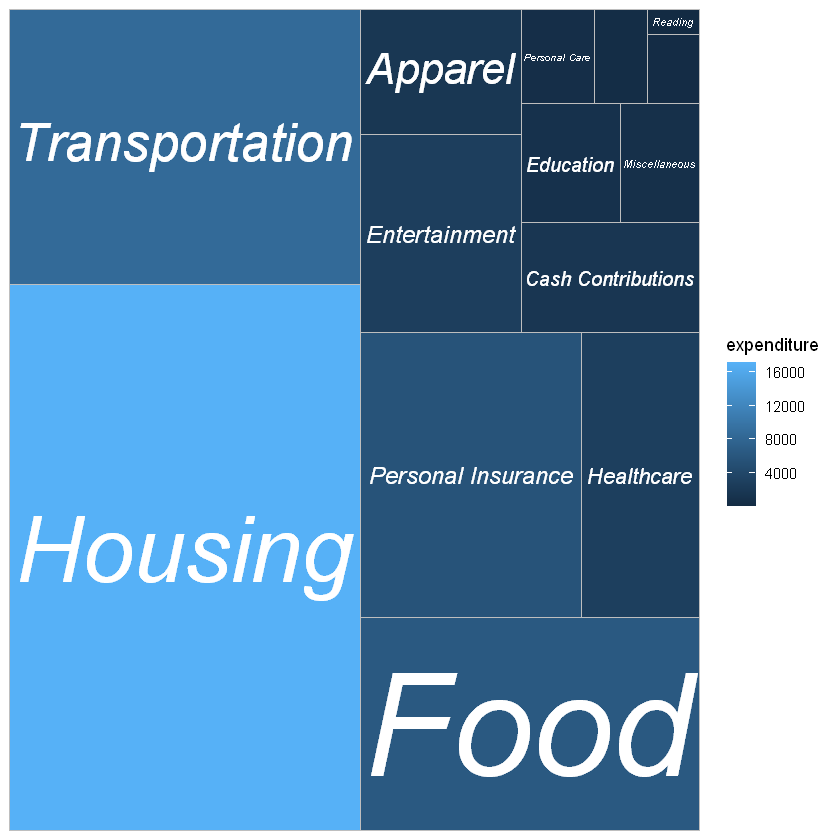

In [24]:
# Use ggplot to look at treemap for only 2008
ggplot(tmap, aes(area = expenditure, fill = expenditure, label = category)) +
  geom_treemap() +
  geom_treemap_text(fontface = "italic", colour = "white", place = "centre",
                    grow = TRUE)

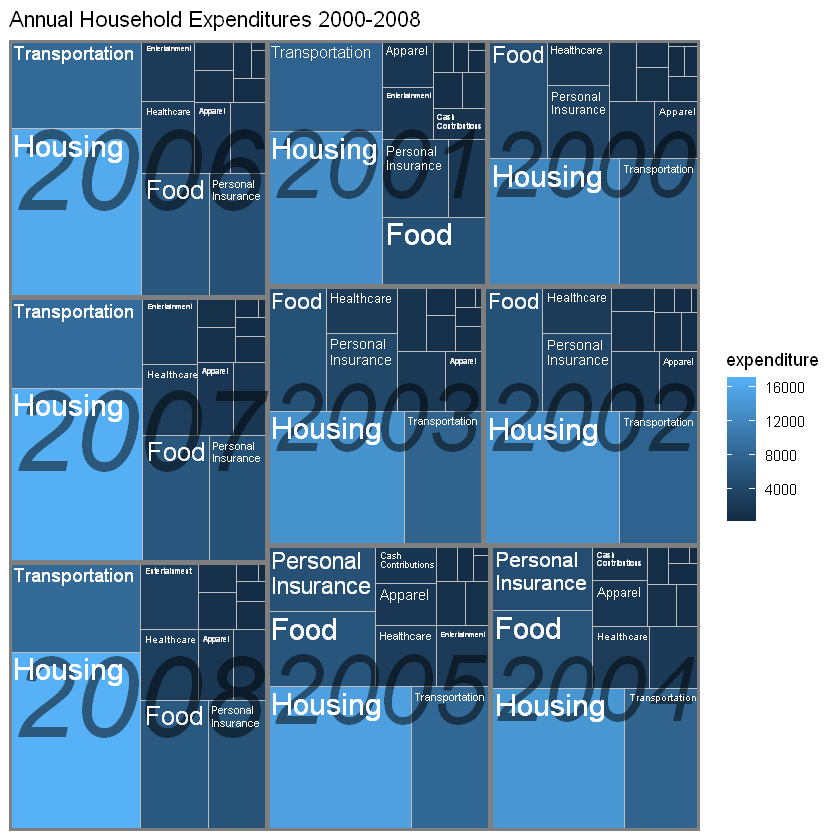

In [42]:
# I wanted more data than just one year, so I subset 2000-2008 data to plot in a treemap
ggplot(eightYr, aes(area = expenditure, fill = expenditure, label = category, subgroup = year)) +
  geom_treemap() +
  geom_treemap_subgroup_border() +
  geom_treemap_subgroup_text(place = "centre", grow = T, alpha = 0.5, colour =
                             "black", fontface = "italic", min.size = 0) +
  geom_treemap_text(colour = "white", place = "topleft", reflow = T) +
  ggtitle("Annual Household Expenditures 2000-2008")

In [52]:
# Subset data to create an area chart to look at the cost of transportation over time
trans <- subset(df, category == "Transportation")

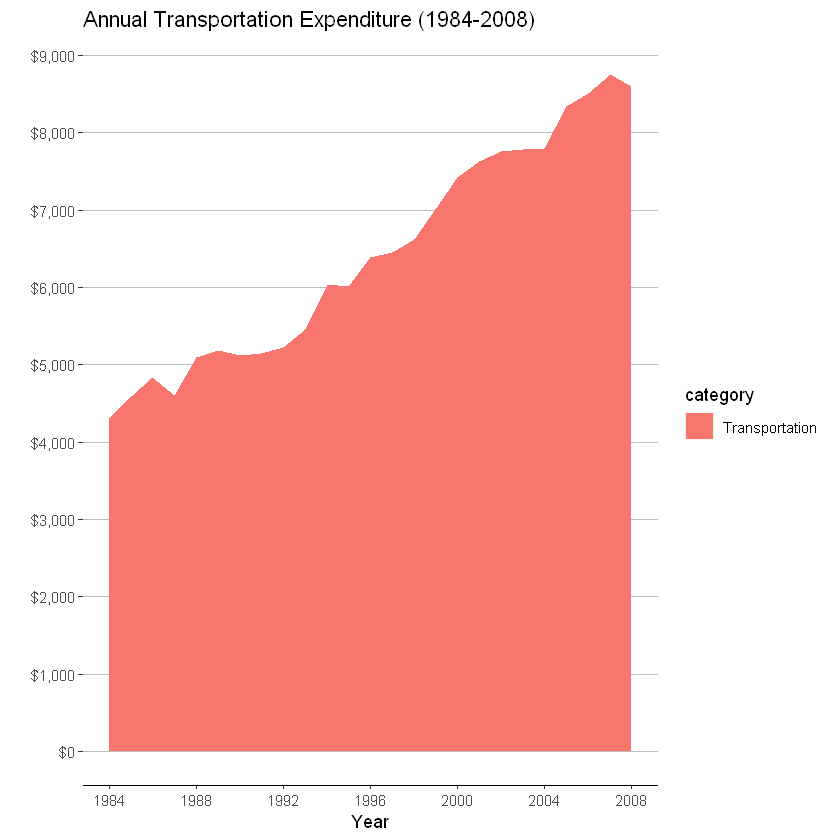

In [79]:
# Create area plot of transportation by year
ggplot(trans, aes(x=year, y=expenditure, fill=category)) + 
  geom_area() +
  scale_x_continuous(breaks=seq(1984,2008,4)) +
  scale_y_continuous(breaks=seq(0,9000,1000), labels=scales::dollar_format()) +
  ggtitle("Annual Transportation Expenditure (1984-2008)") +
  labs(x="Year", y="") +
  # Use theme to remove vertical grid lines and background
  theme(panel.grid.major.x = element_blank(), panel.grid.major.y = element_line( size=.1, color="gray" ), 
    panel.background = element_blank(), 
    axis.line.x = element_line(colour = "black"))



Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font fa

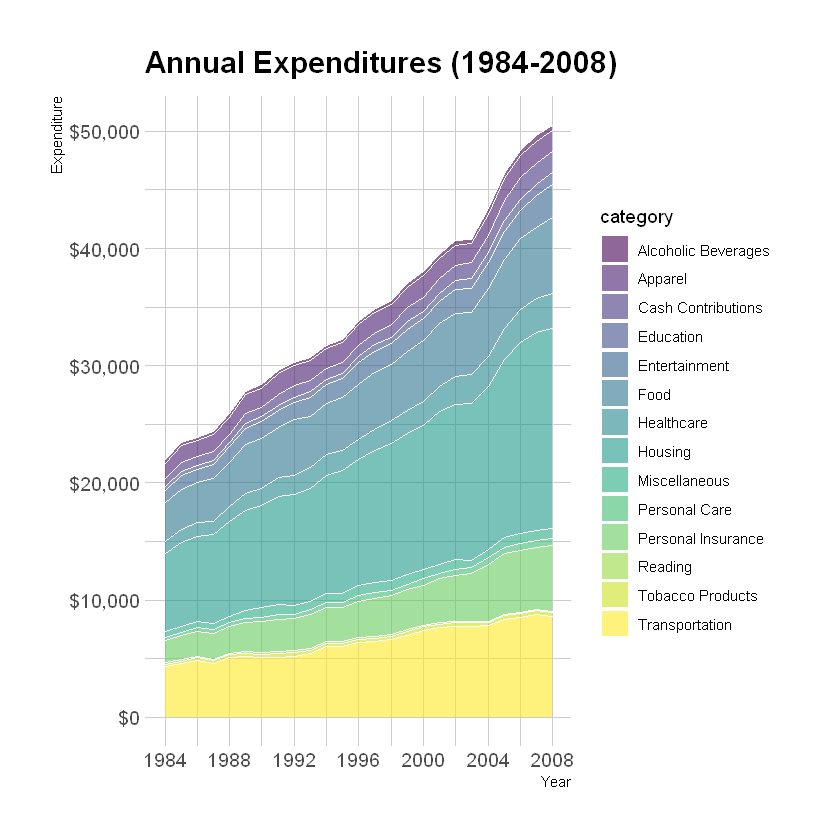

In [5]:
# Import libraries to customize a stacked area chart
library(viridis)
library(hrbrthemes)

# Plot
ggplot(df, aes(x=year, y=expenditure, fill=category)) + 
    geom_area(alpha=0.6 , size=.5, colour="white") +
    scale_x_continuous(breaks=seq(1984,2008,4)) +
    scale_y_continuous(breaks=seq(0,55000,10000), labels=scales::dollar_format()) +
    scale_fill_viridis(discrete = T) +
    theme_ipsum() + 
    labs(x="Year", y="Expenditure") +
    ggtitle("Annual Expenditures (1984-2008)")